In [11]:
import tensorflow as tf

In [12]:
from tensorflow.keras.datasets import fashion_mnist

In [13]:
# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [14]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [15]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [16]:
# Check shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

In [17]:
# 60,000 training examples wach with shape (28,28) and a label each as well as 10,000 test
# examples of shape (28,28).

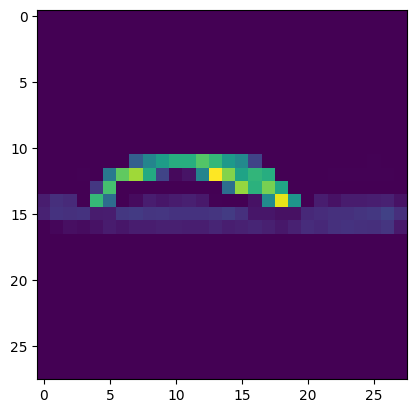

In [18]:
# Plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[63])

In [19]:
# Check our sample's label
train_labels[63]

5

In [20]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

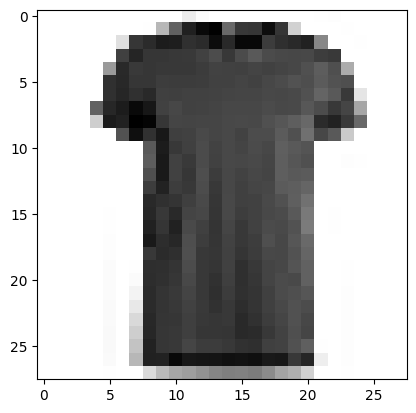

In [21]:
# Plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary) # Change the colors to black and white

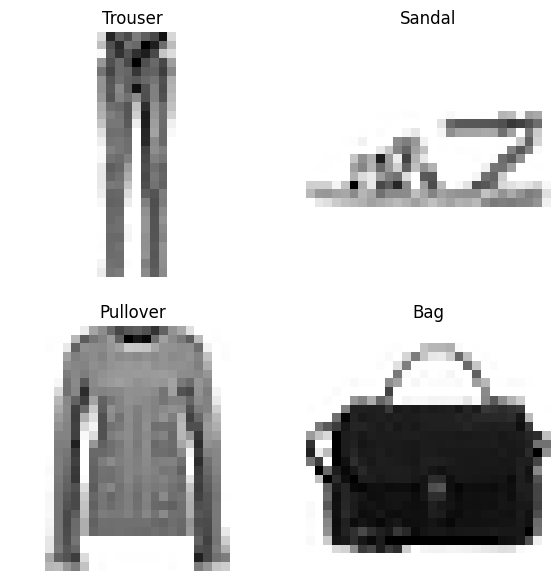

In [22]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

In [23]:
# Check the min and max values of training data
train_data.min(), train_data.max()

(0, 255)

We can get these values between 0 and 1 by dividing the entire array by the maximum: 255.0 (dividing by a float also converts to a float).

Doing so will result in all of our data bieng between 0 and 1 (known as **scaling** or **normalization**).

In [24]:
# Divide train and test images by the maximum value (normalize it).
train_data = train_data/255.0
test_data = test_data/255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

Beautiful! Now our data is between 0 and 1. Let's see what happens when we model it.

We will use the same model as before except this time the data will be normalized.

In [25]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax") # Output shape is 10, activation is softmax
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 3. Fit the model (to the normalized data)
norm_history = model.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 2s 856us/step - loss: 1.2736 - accuracy: 0.5041 - val_loss: 0.9952 - val_accuracy: 0.5844
Epoch 2/10
1875/1875 [==============================] - 1s 762us/step - loss: 0.8941 - accuracy: 0.6396 - val_loss: 0.7998 - val_accuracy: 0.6850
Epoch 3/10
1875/1875 [==============================] - 1s 765us/step - loss: 0.7395 - accuracy: 0.7233 - val_loss: 0.7158 - val_accuracy: 0.7348
Epoch 4/10
1875/1875 [==============================] - 1s 748us/step - loss: 0.6723 - accuracy: 0.7521 - val_loss: 0.6688 - val_accuracy: 0.7548
Epoch 5/10
1875/1875 [==============================] - 1s 762us/step - loss: 0.6414 - accuracy: 0.7607 - val_loss: 0.6569 - val_accuracy: 0.7613
Epoch 6/10
1875/1875 [==============================] - 1s 774us/step - loss: 0.6245 - accuracy: 0.7686 - val_loss: 0.6508 - val_accuracy: 0.7630
Epoch 7/10
1875/1875 [==============================] - 1s 771us/step - loss: 0.6144 - accuracy: 0.7751 - val_loss: 0.6689 -

<Axes: title={'center': 'Normalized Data'}>

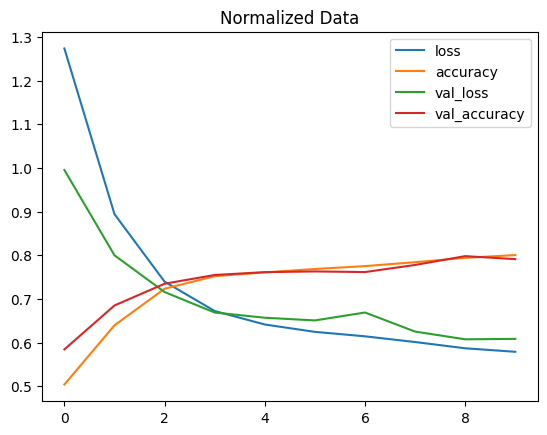

In [26]:
# Let's plot model's history
import pandas as pd
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized Data")